# Forecasting Future ED Demand 

## Overview 

This notebook contains the code to forecast future ED demand under 4 different scenarios:

1. 'do nothing': population grows but population health and health service capacity reamin unchanged
2. Increase 111 capacity by 10% in 2020
3. Increase 999 capacity by 10% in 2020
4. Increase GP capacity by 10% in 2020
5. If population health measures (People, Places, Lives) are less than the 2019 average, increase them by 0.2 points per year until they reach the 2019 average. 

In [1]:
#turn warnings off to keep notebook tidy
import warnings
warnings.filterwarnings('ignore') 

## Import libraries 

In [2]:
import os
import pandas as pd
import numpy as np
import pickle as pkl

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Import trained models 

In [3]:
with open('stacked_model_scaled.pkl','rb') as f:
    
    models, m1_features, m2_features = pkl.load(f)

**NB** if running notebook on colab the above code wont work. 
Instead, run the following cell: 

0.4519048888936743
0.4227235191823048
0.7809961790244568
0.8028603990777634
(1618, 18)


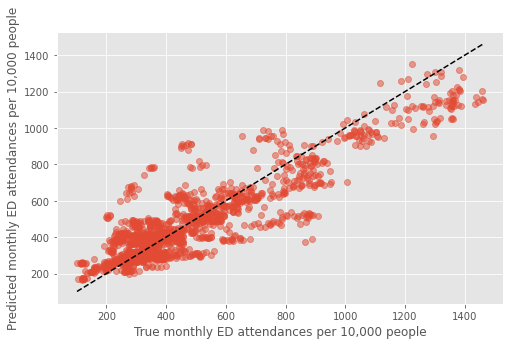

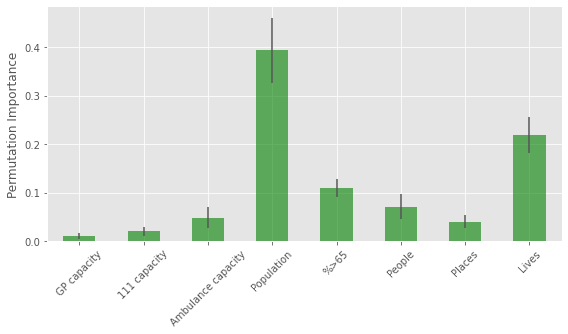

Combined training score: 0.9181958242731308


In [4]:
%run stacked_model.ipynb

models = [rf1,rf2,final]

## Import population forecasts 

In [5]:
population = pd.read_csv('https://raw.githubusercontent.com/CharlotteJames/ed-forecast/main/data/pop_forecasts_scaled_new.csv',
                  index_col=0)

In [6]:
population

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2035,2036,2037,2038,2039,2040,2041,2042,2043,ccg
0,200.8447,202.9265,204.7996,206.5125,208.0446,209.3943,210.5565,211.5642,212.5387,213.4931,...,221.2491,222.2393,223.2383,224.2422,225.2318,226.1957,227.1281,228.0246,228.8859,A3A8R
1,209.5479,210.8074,211.8850,212.8265,213.6216,214.2545,214.7215,215.0593,215.4030,215.7479,...,219.0375,219.4856,219.9439,220.4162,220.8884,221.3468,221.7894,222.2189,222.6387,W2U3Z
2,149.4905,150.2535,150.9484,151.6046,152.1883,152.6870,153.1002,153.4384,153.7346,154.0150,...,156.6288,157.0287,157.4507,157.8919,158.3365,158.7785,159.2128,159.6398,160.0604,36L
3,181.1249,182.6084,183.9507,185.1905,186.3272,187.3571,188.2697,189.0749,189.8431,190.5932,...,197.0201,197.8779,198.7388,199.6013,200.4489,201.2717,202.0611,202.8162,203.5407,72Q
4,149.8001,151.1457,152.3376,153.3887,154.3113,155.1054,155.7686,156.3214,156.8646,157.4020,...,161.9110,162.4828,163.0498,163.6149,164.1693,164.7041,165.2164,165.7083,166.1828,93C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,21.5133,21.6203,21.6898,21.7321,21.7657,21.8065,21.8544,21.9101,21.9739,22.0439,...,22.4638,22.5006,22.5295,22.5486,22.5715,22.5996,22.6308,22.6632,22.6963,10R
77,48.9709,49.2387,49.4684,49.6714,49.8482,50.0060,50.1449,50.2665,50.3747,50.4696,...,50.9995,51.0625,51.1297,51.1994,51.2754,51.3581,51.4457,51.5383,51.6351,15A
78,56.8210,57.4154,57.9778,58.5240,59.0612,59.5859,60.1019,60.6047,61.0936,61.5704,...,64.7377,65.0715,65.3987,65.7217,66.0425,66.3625,66.6815,66.9986,67.3133,11N
79,55.9399,56.3600,56.7726,57.1821,57.5799,57.9658,58.3368,58.6904,59.0312,59.3577,...,61.6103,61.8668,62.1228,62.3799,62.6334,62.8819,63.1262,63.3669,63.6048,11X


In [7]:
pop_g65 = pd.read_csv('https://raw.githubusercontent.com/CharlotteJames/ed-forecast/main/data/g65_forecasts.csv',index_col=0)

In [8]:
pop_g65

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2035,2036,2037,2038,2039,2040,2041,2042,2043,ccg
0,20.2388,20.6635,21.0618,21.5045,22.0027,22.5320,23.0877,23.6772,24.2807,24.8923,...,30.3201,30.9727,31.5959,32.1724,32.7359,33.3015,33.8719,34.4506,35.0449,A3A8R
1,27.1862,27.8837,28.5918,29.3262,30.0403,30.8135,31.5979,32.4221,33.2414,34.1069,...,41.0640,41.8279,42.5907,43.3212,44.0126,44.6750,45.3063,45.9144,46.5156,W2U3Z
2,19.5244,19.8915,20.2332,20.6187,21.0258,21.4313,21.8943,22.3840,22.9167,23.4920,...,28.2659,28.7972,29.3256,29.8007,30.2389,30.6803,31.0964,31.5105,31.9304,36L
3,21.0098,21.3213,21.6398,22.0230,22.4571,22.9487,23.4649,24.0559,24.6942,25.3515,...,30.7090,31.2815,31.8039,32.2985,32.7302,33.1674,33.6041,34.0586,34.5384,72Q
4,17.9621,18.3575,18.7495,19.1965,19.6389,20.1272,20.6242,21.1690,21.7385,22.3233,...,27.4761,28.0851,28.6468,29.1815,29.6886,30.1636,30.6436,31.1056,31.5832,93C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,3.0259,3.0547,3.0857,3.1195,3.1657,3.2209,3.2819,3.3473,3.4182,3.4892,...,4.0243,4.0746,4.1183,4.1523,4.1721,4.1880,4.2006,4.2061,4.2109,10R
72,7.9460,8.1037,8.2478,8.4048,8.5756,8.7639,8.9335,9.1132,9.3127,9.5121,...,11.0942,11.2711,11.4332,11.5656,11.6790,11.7874,11.8764,11.9739,12.0688,15A
73,14.0208,14.3092,14.5511,14.8208,15.1230,15.4326,15.7556,16.0784,16.4241,16.7932,...,19.7539,20.0748,20.3465,20.5729,20.7435,20.8763,20.9833,21.0689,21.1576,11N
74,13.6861,14.0132,14.2861,14.5547,14.8588,15.1808,15.5102,15.8431,16.2210,16.6014,...,19.5537,19.8510,20.1130,20.3116,20.4647,20.5849,20.6686,20.7340,20.8045,11X


## Import 2019 data as baseline 

In [9]:
baseline = pd.read_csv('https://raw.githubusercontent.com/CharlotteJames/ed-forecast/main/data/master_scaled_new_pop.csv',
                  index_col=0)

In [10]:
baseline.columns = ['_'.join([c.split('/')[0],c.split('/')[-1]]) 
                    if '/' in c else c for c in baseline.columns]

baseline = baseline.loc[baseline.year==2019]

In [11]:
baseline

,ccg,month,111_111_offered,111_111_answered,amb_sys_made,amb_sys_answered,gp_appt_available,ae_attendances_attendances,population,People,Places,Lives,year,%>65,%<15,N>65,N<15
806,00Q,Jan,347.450401,275.144606,276.797526,223.661852,4665.289367,1044.377666,14.9084,96.0,99.5,94.6,2019,14.565614,21.714604,2.1715,3.2373
807,00Q,Feb,311.886541,253.462976,247.201714,198.606966,4060.932092,972.136514,14.9084,96.0,99.5,94.6,2019,14.565614,21.714604,2.1715,3.2373
808,00Q,Mar,317.916884,277.724317,259.446256,208.037004,4191.127150,1056.317244,14.9084,96.0,99.5,94.6,2019,14.565614,21.714604,2.1715,3.2373
809,00Q,Apr,326.639691,286.837872,261.284595,207.529233,3765.259854,1068.458050,14.9084,96.0,99.5,94.6,2019,14.565614,21.714604,2.1715,3.2373
810,00Q,May,331.225629,287.382197,263.684592,207.844258,3888.881436,1085.294197,14.9084,96.0,99.5,94.6,2019,14.565614,21.714604,2.1715,3.2373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,X2C4Y,Aug,281.008273,253.093792,459.652700,306.843650,3982.517935,390.405530,44.0337,93.3,98.3,97.6,2019,17.721427,19.239128,7.8034,8.4717
1614,X2C4Y,Sep,263.936917,240.868701,453.078703,305.262399,4598.750502,388.679580,44.0337,93.3,98.3,97.6,2019,17.721427,19.239128,7.8034,8.4717
1615,X2C4Y,Oct,286.454848,254.680032,488.348051,327.202669,5225.611293,391.268506,44.0337,93.3,98.3,97.6,2019,17.721427,19.239128,7.8034,8.4717
1616,X2C4Y,Nov,326.984206,276.374619,499.497654,306.953594,4606.948769,389.542555,44.0337,93.3,98.3,97.6,2019,17.721427,19.239128,7.8034,8.4717


## Functions 

Model predicts monthly ED attendances per 10,000 people

To forecast raw numbers, need to multiply predicted value by population/10,000

In [12]:
def stacked_predict(X, models, m1_features, m2_features):
    
    rf1,rf2,final = models
    
    y_pred_1 = rf1.predict(X[m1_features])

    y_pred_2 = rf2.predict(X[m2_features])

    X_f = np.vstack([y_pred_1, y_pred_2]).T
    
    preds = final.predict(X_f)
    
    return preds

In [13]:
def forecast(data, pop, pop_g65, year, models, m1_features, m2_features):
    
    # model = reg
    
    data = data.merge(pop[[str(year),'ccg']], 
                      left_on = 'ccg', right_on='ccg')
    
    data['population'] = data[str(year)]#*10000
    
    data = data.drop([str(year)],axis=1)
    
    data = data.merge(pop_g65[[str(year),'ccg']], 
                      left_on = 'ccg', right_on='ccg')
    
    data['%>65'] = data[str(year)]*100/(data['population'])
    data['N>65'] = data[str(year)]
    
    X = data.drop(['ae_attendances_attendances','ccg',\
                   'month',str(year),'ccg'], axis=1)
    
    preds = stacked_predict(X, models, m1_features, m2_features)
    
    preds = preds*data['population'].values
    
    return preds

In [14]:
def sum_by_month(results):

    to_plot = []

    months = ['Jan','Feb','Mar','Apr','May','Jun',\
              'Jul','Aug','Sep','Oct','Nov','Dec']

    for month in months:

        res = results.loc[results.month==month]
        to_plot.append(np.mean(res[res.columns[2:]].values, axis=0))

    to_plot = np.array(to_plot).T

    points = []

    for row in to_plot:

        points.extend(row)
        
    return points

### List to store scenario results 

In [15]:
scenario_results = []

### Scaling factor for capacity increase 

In [16]:
F=1.1

## Scenario 1: do nothing 

In [17]:
results = pd.DataFrame()
results['ccg'] = baseline['ccg']
results['month'] = baseline['month']
results['2019'] = baseline['ae_attendances_attendances']*baseline['population']

for year in np.arange(2020,2028):

    preds = forecast(baseline,population,pop_g65,year,models,m1_features,m2_features)
    
    results[str(year)] = preds

In [18]:
scenario_results.append(results)

## Scenario 2: increase 111 capacity

In [19]:
results = pd.DataFrame()
results['ccg'] = baseline['ccg']
results['month'] = baseline['month']
results['2019'] = baseline['ae_attendances_attendances']*baseline['population']

dta = baseline.copy()

for year in np.arange(2020,2028):

    dta['111_111_offered'] = baseline['111_111_offered'].values*F

    preds = forecast(dta,population,pop_g65,year,models,m1_features,m2_features)
    
    results[str(year)] = preds

In [20]:
scenario_results.append(results)

## Scenario 3: increase 999 capacity

In [21]:
results = pd.DataFrame()
results['ccg'] = baseline['ccg']
results['month'] = baseline['month']
results['2019'] = baseline['ae_attendances_attendances']*baseline['population']

dta = baseline.copy()

for year in np.arange(2020,2028):
    
    dta['amb_sys_answered'] = baseline['amb_sys_answered'].values*F

    preds = forecast(dta,population,pop_g65,year,models,m1_features,m2_features)
    
    results[str(year)] = preds

In [22]:
scenario_results.append(results)

## Scenario 4: increase GP capacity

In [23]:
results = pd.DataFrame()
results['ccg'] = baseline['ccg']
results['month'] = baseline['month']
results['2019'] = baseline['ae_attendances_attendances']*baseline['population']

dta = baseline.copy()

for year in np.arange(2020,2028):
    
    dta['gp_appt_available'] = baseline['gp_appt_available'].values*F

    preds = forecast(dta,population,pop_g65,year,models,m1_features,m2_features)
    
    results[str(year)] = preds

In [24]:
scenario_results.append(results)

## Scenario 5: health of population at 2019

In [25]:
results = pd.DataFrame()
results['ccg'] = baseline['ccg']
results['month'] = baseline['month']
results['2019'] = baseline['ae_attendances_attendances']*baseline['population']

dta = baseline.copy()


for year in np.arange(2020,2028):
    
    dta['People'] = [p+0.2 if p<np.mean(baseline.People.values) else p for p in dta.People.values]
    dta['Places'] = [p+0.2 if p<np.mean(baseline.Places.values) else p for p in dta.Places.values]
    dta['Lives'] = [p+0.2 if p<np.mean(baseline.Lives.values) else p for p in dta.Lives.values]

    preds = forecast(dta,population,pop_g65,year,models,m1_features,m2_features)
    
    results[str(year)] = preds

In [26]:
scenario_results.append(results)

## Plot 

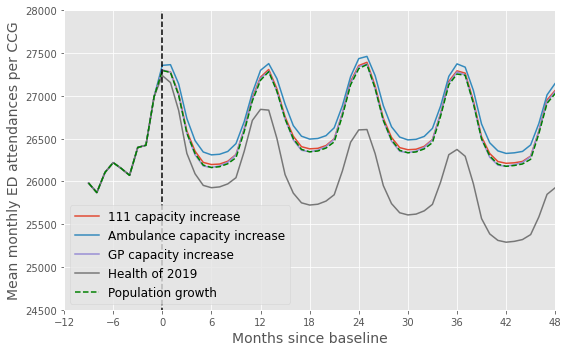

In [27]:
fig,ax = plt.subplots(figsize=(8,5))

scenarios = ['Population growth','111 capacity increase',
            'Ambulance capacity increase','GP capacity increase', 'Health of 2019']

for i,results in enumerate(scenario_results):
    
    if i==0:
        
        continue
    
    points = sum_by_month(results)
    
    points_series = pd.Series(points)
    
    plt.plot(np.arange(-12, 96),
             points_series.rolling(window=4).mean().to_list()[:], 
             label = f'{scenarios[i]}')
    
    
points = sum_by_month(scenario_results[0])

points_series = pd.Series(points)
    
plt.plot(np.arange(-12, 96),
         points_series.rolling(window=4).mean().to_list()[:],
         'g--', label = f'{scenarios[0]}')

    
y = np.arange(24000,29000,1000)    
plt.plot(np.zeros(len(y)),y, 'k--')

plt.legend(loc = 'lower left', fontsize=12)
plt.ylabel('Mean monthly ED attendances per CCG', fontsize=14)
plt.xlabel('Months since baseline', fontsize=14)
plt.xlim(0,48)

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(-12, 50, 6))

plt.ylim(24500,28000)
plt.tight_layout()
plt.savefig('forecast_scaled.png', dpi=300)
plt.show()